# Symbolic computing

+ handcalc
+ sympy

## 1. handcalc

In [1]:
from math import pi, ceil, sqrt, sin, asin
from scipy.integrate import quad

import handcalcs.render
from handcalcs.decorator import handcalc

from forallpeople import m, s

In [2]:
%%render
# Parameters
a = 2
b = 5
c = 3

<IPython.core.display.Latex object>

In [3]:
%%render
# Symbolic
x = (-b+sqrt(b**2-4*a*c))/(2*a) # This is a quadratic equation 

<IPython.core.display.Latex object>

In [4]:
%%tex
x = (-b+sqrt(b**2-4*a*c))/(2*a)

\[
\begin{aligned}
x &= \frac{ - b + \sqrt{ \left( \left( b \right) ^{ 2 } - 4 \cdot a \cdot c \right) } }{ 2 \cdot a } = \frac{ - 5 + \sqrt{ \left( \left( 5 \right) ^{ 2 } - 4 \cdot 2 \cdot 3 \right) } }{ 2 \cdot 2 } &= -1.0
\end{aligned}
\]


In [5]:
%%render
# Short
f = a/b + c
g = sqrt(a/b) + asin(sin(b/c)) + (a/b)**0.5 + sqrt((a*b + b*c)/(b**2)) + sin(a/b)

<IPython.core.display.Latex object>

In [6]:
def f(x):
    return x**2 + 3 * x

In [7]:
%%render
# Long
F = quad(f, a, b)

<IPython.core.display.Latex object>

In [8]:
%%render
# Parameters
distance = 100 * m
time = 5 * s

Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0


<IPython.core.display.Latex object>

In [9]:
%%render
velocity = distance / time

Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1.0, New Factor: 1.0
Factor: 1, New Factor: 1.0


<IPython.core.display.Latex object>

## 2. sympy

Meurer et al., SymPy: symbolic computing in Python, PeerJ Comput. Sci., 3:e103, 2017.

In [10]:
from sympy import *

Real, Rational, Float, Integer

In [11]:
a = Rational(1, 2)
a

1/2

In [12]:
a*2

1

In [13]:
Rational(1, 2) + Rational(1, 3)

5/6

In [14]:
Float(1.1, 30)

1.10000000000000008881784197001

In [15]:
pi

pi

In [16]:
pi.evalf()

3.14159265358979

In [17]:
pi**2

pi**2

In [18]:
(pi + exp(1)).evalf()

5.85987448204884

In [19]:
sqrt(2).evalf(100)

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573

In [20]:
oo > 99999

True

In [21]:
oo + 1

oo

evalf

In [22]:
cos(exp(-100)).evalf(25) - 1

0

In [23]:
(cos(exp(-100)) - 1).evalf(25)

-6.919482633683687653243407e-88

multi-precision

In [24]:
import mpmath

mpmath.mp.dps = 30 # 30 digits of precision
mpmath.mpf("0.1") + mpmath.exp(-50)

mpf('0.100000000000000000000192874984794')

The Meijer G-function instance $G_{1,3}^{3,0}(0;1/2,-1,-3/2|x)$ is a good test case; past versions of both Maple and Mathematica produced incorrect numerical values for large x > 0. 

In [25]:
meijerg([[],[0]], [[-S(1)/2,-1,-S(3)/2],[]], 10000).evalf()

2.43925769071996e-94

In [26]:
mpmath.mp.dps = 15
mpmath.meijerg([[],[0]], [[-0.5,-1,-1.5],[]], 10000)

mpf('2.4392576907199564e-94')

symbols, Symbol

In [27]:
x = Symbol('x')
y = Symbol('y')

In [28]:
sqrt(x ** 2)

sqrt(x**2)

Some of the common assumptions are negative, real, nonpositive, integer, prime and commutative.

In [29]:
x = Symbol('x', positive=True)

In [30]:
sqrt(x ** 2)

x

In [31]:
x.is_positive

True

In [32]:
x, y = symbols('x y')

In [33]:
x + y + x - y

2*x

A computer algebra system(CAS) stores mathematical expressions as data structures. For example, the mathematical expression `x + y` is represented as a tree with three nodes `+`, `x`, and `y`, where `x` and `y` are ordered children of `+`. As users manipulate mathematical expressions with traditional mathematical syntax, the CAS manipulates the underlying data structures. Symbolic computations such as integration, simplification, etc. are all functions that consume and produce expression trees.

In SymPy, every symbolic expression is an instance of the class `Basic`, the superclass of all SymPy types providing common methods to all SymPy tree-elements, such as traversals. The children of a node in the tree are held in the `args` attribute. A leaf node in the expression tree has empty args.

In [34]:
expr = (x + y) ** 2
expr

(x + y)**2

In [35]:
type(expr)

sympy.core.power.Pow

In [36]:
expr.args

(x + y, 2)

a key identity invariant

In [37]:
expr.func(*expr.args) == expr

True

Note that in SymPy the `==` operator represents exact structural equality, not mathematical equality. This allows
testing if any two expressions are equal to one another as expression trees.

In [38]:
x ** 2 + 2 * x * y + y ** 2 == expr

False

The dotprint function from the `sympy.printing.dot` submodule prints output to dot format, which can be rendered with Graphviz to visualize expression trees graphically.

In [39]:
srepr(expr)

"Pow(Add(Symbol('x'), Symbol('y')), Integer(2))"

In [40]:
init_printing(use_unicode=False, wrap_line=True)

expand, factor, collect, cancel, apart, hyperexpand

powsimp, trigsimp, logcombine, radsimp

In [41]:
expand((x + y) ** 3)

In [42]:
3 * x * y ** 2 + 3 * y * x ** 2 + x ** 3 + y ** 3

In [43]:
expand((x + y) ** 6)

In [44]:
expand(x + y, complex=True)

In [45]:
I * im(x) + I * im(y) + re(x) + re(y)

In [46]:
expand(cos(x + y), trig=True)

In [47]:
cos(x) * cos(y) - sin(x) * sin(y)

In [48]:
simplify((x + x * y) / x)

In [49]:
simplify(sin(x) / cos(x))

In [50]:
collect(y*x**2 + 3*x**2 - x*y + x - 1, x)

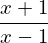

In [51]:
cancel((x**2 + 2*x + 1)/(x**2 - 1))

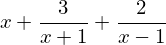

In [52]:
apart((x**3 + 4*x - 1)/(x**2 - 1))

a hypergeometric function

$_2F_1\left(\begin{matrix} 1, 1 \\ 2 \end{matrix} \vert -x \right)$

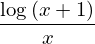

In [53]:
hyperexpand(hyper([1, 1], [2], -x))

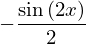

In [54]:
trigsimp(cos(x)**2*tan(x) - sin(2*x))

Gröbner bases

In [55]:
x0, x1, x2 = symbols('x0 x1 x2')

I = [x0 + 2*x1 + 2*x2 - 1, x0**2 + 2*x1**2 + 2*x2**2 - x0, 2*x0*x1 + 2*x1*x2 - x1]
groebner(I, order='lex')

In [56]:
limit(x, x, oo)

In [57]:
limit(1/x, x, oo)

In [58]:
limit(x**x, x, 0)

In [59]:
limit(exp(x + 2*exp(-x)) - exp(x) + 1/x, x, oo)

In [60]:
limit(sin(x)/x, x, 0)

In [61]:
limit((tan(x+y) - tan(x))/y, y, 0)

In [62]:
diff(log(x), x)

In [63]:
diff(sin(x), x)

In [64]:
diff(sin(2*x), x)

In [65]:
diff(sin(2*x), x, 1)

In [66]:
diff(sin(2*x), x, 2)

In [67]:
diff(sin(2*x), x, 3)

In [68]:
diff(tan(x), x)

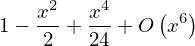

In [69]:
series(cos(x), x)

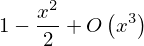

In [70]:
series(cos(x), x, 0, 3)

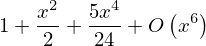

In [71]:
series(1/cos(x), x)

Gruntz algorithm

Gruntz, D. (1996). On Computing Limits in a Symbolic Manipulation System. PhD thesis, Swiss Federal Institute of Technology, Zürich, Switzerland.

In [72]:
# most rapidly varying subexpressions
from sympy.series.gruntz import mrv, rewrite
m = mrv(exp(x + 2*exp(-x)) - exp(x) + 1/x, x)
m[0].keys()

dict_keys([exp(x), exp(x + 2*exp(-x)), exp(-x)])

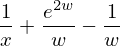

In [73]:
w = Symbol('w')
rewrite(m[1], m[0], x, w)[0]

using the powerful extended Risch-Norman algorithm and some heuristics and pattern matching

Integrals are calculated with the integrate function. SymPy implements a combination of the Risch algorithm, table lookups, a reimplementation of Manuel Bronstein’s ‘‘Poor Man’s Integrator’’, and an algorithm for computing integrals based on Meijer G-functions.

In [74]:
integrate(6 * x**5, x)

In [75]:
integrate(log(x), x)

In [76]:
integrate(sin(x), x)

In [77]:
integrate(2*x + sinh(x), x)

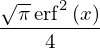

In [78]:
integrate(exp(- x**2) * erf(x), x)

In [79]:
integrate(x**3, (x, -1, 1))

In [80]:
integrate(sin(x), (x, 0, pi/2))

In [81]:
integrate(cos(x), (x, -pi/2, pi/2))

In [82]:
integrate(exp(-x), (x, 0, oo))

In [83]:
integrate(exp(- x**2), (x, oo, oo))

Summations are computed with the summation function, which uses a combination of Gosper’s algorithm, an algorithm that uses Meijer G-functions, and heuristics. Products are computed with product function via a suite of heuristics.

In [84]:
i, n = symbols('i n')

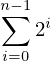

In [85]:
Sum(2**i, (i, 0, n-1))

In [86]:
summation(2**i, (i, 0, n-1))

In [87]:
summation(i*factorial(i), (i, 1, n))

In [88]:
from mpmath import nsum
nsum(sin, (0, 1))

mpf('0.8414709848078965')

In [89]:
solveset(x**4 - 1, x)

In [90]:
solveset(exp(x) + 1, x)

In [91]:
solution = solve((x + y - 2, 2*x + y), (x, y))
solution

In [92]:
solution = solve((x + 5*y - 2, -3*x + 6*y - 15), (x, y))
solution

In [93]:
solution[x], solution[y]

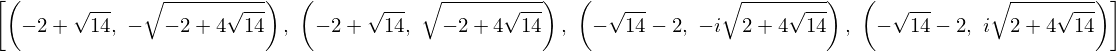

In [94]:
solve([x**2 + y**2 - 16, 4*x - y**2 + 6], x, y)

In [95]:
solve((x + log(x))**2 - 5*(x + log(x)) + 6, x)

In [96]:
f = x**4 - 3 * x**2 + 1

In [97]:
factor(f)

In [98]:
factor(f, modulus=5)

In [99]:
x, y, z = symbols('x y z')
e = (x & y) | z
e.subs({x: True, y: True, z: False})

In [100]:
satisfiable(x & y)

{x: True, y: True}

In [101]:
satisfiable(x & ~x)

False

In [102]:
satisfiable((~x | y) & (~y | x))

{y: False, x: False}

SparseMatrix, BlockMatrix

MatrixSymbol

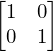

In [103]:
Matrix([[1, 0], [0, 1]])

In [104]:
x, y = symbols('x, y')

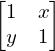

In [105]:
A = Matrix([[1, x], [y, 1]])
A

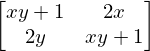

In [106]:
B = A**2
B

In [107]:
B.eigenvals()

In [108]:
f, g = symbols('f g', cls=Function)

In [109]:
f(x)

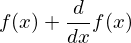

In [110]:
f(x).diff(x) + f(x)

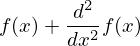

In [111]:
f(x).diff(x, x) + f(x)

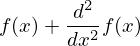

In [112]:
f(x).diff(x, 2) + f(x)

In [113]:
dsolve(f(x).diff(x) + f(x), f(x))

In [114]:
dsolve(f(x).diff(x, x) + f(x), f(x))

Bernoulli differential equation

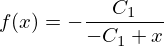

In [115]:
dsolve(x * f(x).diff(x) + f(x) - f(x)**2, f(x))

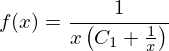

In [116]:
dsolve(x * f(x).diff(x) + f(x) - f(x)**2, f(x), hint='Bernoulli')

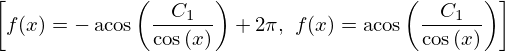

In [117]:
dsolve(sin(x) * cos(f(x)) + cos(x) * sin(f(x)) * f(x).diff(x), f(x), hint='separable')

SymPy provides definitions of most common distributions, including Uniform, Poisson, Normal, Binomial, Bernoulli, and many others.

In [118]:
from sympy.stats import Die, P, E

X, Y = Die("X"), Die("Y")

print(P(Eq(X, 6) & Eq(Y, 6)))
print(P(X > Y))

print(E(X, X+Y < 5, evaluate=False))
print(E(X, X+Y < 5))

1/36
5/12
5/3
5/3
